# Modelos Estatísticos Clássicos

* [x] Análise Exploratória de Dados
* [x] Testes de hipótese
* [x] Regressão Linear
* [x] Regressão Logística
* [x] Modelos Lineares Generalizados
    * [x] Regressão Logística (de novo, mas de um jeito novo)
    * [x] Regressão de Poisson
* [x] Séries Temporais:
    * [x] ACF e PACF
    * [x] Teste de Raiz Unitária 
    * [x] ARIMA
    * [x] Auto-Arima
* [x] Bootstrapping
* [x] Ajuste de uma curva genérica a um conjunto de pontos

# Importa pacotes de uso geral

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importa dados

In [2]:
df = pd.read_excel('dados/imoveis.xls')
df.head()

,Mês,Preço,Área,Quartos,Idade,Localização,Corretora
0,Março,92500,1605,3,6,Dallas,Outra corretora
1,Março,143800,2741,4,5,Dallas,Outra corretora
2,Março,130500,2393,3,7,Dallas,Outra corretora
3,Março,123100,2209,4,8,Dallas,Outra corretora
4,Março,98800,1544,3,7,Dallas,Outra corretora


# O problema de negócio

A corretora Easton está sendo acusada de praticar _dumping_!  
O que dizem os dados?

In [3]:
df[['Corretora','Preço']].groupby('Corretora').mean().round()

,Preço
Corretora,
Easton,87112.0
Outra corretora,94118.0


# Testes de hipótese

In [4]:
precos_easton = df.loc[df.Corretora == 'Easton', 'Preço']
precos_outras = df.loc[df.Corretora != 'Easton', 'Preço']

In [5]:
from scipy.stats import shapiro, levene, ttest_ind, median_test

In [6]:
print(shapiro(precos_easton))
print(shapiro(precos_outras))

ShapiroResult(statistic=0.9495602250099182, pvalue=0.03545036539435387)
ShapiroResult(statistic=0.9895817041397095, pvalue=0.002066616667434573)


In [7]:
_, p, _, _ = median_test(precos_easton, precos_outras)
print(p)

0.0032194401914435755


E se tivéssemos preços normais e quiséssemos fazer um teste de comparação de médias?

In [8]:
#Teste de igualdade entre variâncias populacionais
levene(precos_easton, precos_outras)

LeveneResult(statistic=7.137938346307354, pvalue=0.007785507943627083)

In [9]:
#Teste de hipótese de comparação de médias de amostras independentes
ttest_ind(precos_easton, precos_outras, alternative = 'less', equal_var=False)

Ttest_indResult(statistic=-3.0791112401030927, pvalue=0.0015278028735895924)

# Preparação dos dados

In [10]:
df.dtypes

Mês            object
Preço           int64
Área            int64
Quartos         int64
Idade           int64
Localização    object
Corretora      object
dtype: object

In [11]:
df = pd.get_dummies(df, dtype='int64')
df.head()

,Preço,Área,Quartos,Idade,Mês_Abril,Mês_Junho,Mês_Maio,Mês_Março,Localização_Dallas,Localização_Demais municípios da Região Metropolitana,Localização_Fort Worth,Corretora_Easton,Corretora_Outra corretora
0,92500,1605,3,6,0,0,0,1,1,0,0,0,1
1,143800,2741,4,5,0,0,0,1,1,0,0,0,1
2,130500,2393,3,7,0,0,0,1,1,0,0,0,1
3,123100,2209,4,8,0,0,0,1,1,0,0,0,1
4,98800,1544,3,7,0,0,0,1,1,0,0,0,1


In [12]:
df.dtypes

Preço                                                    int64
Área                                                     int64
Quartos                                                  int64
Idade                                                    int64
Mês_Abril                                                int64
Mês_Junho                                                int64
Mês_Maio                                                 int64
Mês_Março                                                int64
Localização_Dallas                                       int64
Localização_Demais municípios da Região Metropolitana    int64
Localização_Fort Worth                                   int64
Corretora_Easton                                         int64
Corretora_Outra corretora                                int64
dtype: object

In [13]:
df = df.drop(columns=['Mês_Março','Localização_Demais municípios da Região Metropolitana','Corretora_Outra corretora'])

In [14]:
df.dtypes

Preço                     int64
Área                      int64
Quartos                   int64
Idade                     int64
Mês_Abril                 int64
Mês_Junho                 int64
Mês_Maio                  int64
Localização_Dallas        int64
Localização_Fort Worth    int64
Corretora_Easton          int64
dtype: object

# EDA

In [15]:
#!pip install pandas_profiling

In [16]:
from pandas_profiling import ProfileReport

In [17]:
#ProfileReport(df)

Alternativas ao pandas_profilling:

* [SweetViz](https://pypi.org/project/sweetviz/)
* [AutoViz](https://pypi.org/project/autoviz/)
* [DTale](https://pypi.org/project/dtale/)
* [Pandas GUI](https://pypi.org/project/pandasgui/)
* [BitRook](https://www.bitrook.com/)
* [Lux](https://lux-api.readthedocs.io/en/latest/source/getting_started/overview.html)

# Regressão Linear

In [75]:
import statsmodels.api as sm

In [76]:
y = df['Preço']
X = df.drop(columns=['Preço'])

In [20]:
X = sm.add_constant(X)
X.head()

,const,Área,Quartos,Idade,Mês_Abril,Mês_Junho,Mês_Maio,Localização_Dallas,Localização_Fort Worth,Corretora_Easton
0,1.0,1605,3,6,0,0,0,1,0,0
1,1.0,2741,4,5,0,0,0,1,0,0
2,1.0,2393,3,7,0,0,0,1,0,0
3,1.0,2209,4,8,0,0,0,1,0,0
4,1.0,1544,3,7,0,0,0,1,0,0


In [21]:
linreg = sm.OLS(y, X).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     648.2
Date:                Tue, 26 Jul 2022   Prob (F-statistic):          5.73e-272
Time:                        01:04:13   Log-Likelihood:                -5155.0
No. Observations:                 518   AIC:                         1.033e+04
Df Residuals:                     508   BIC:                         1.037e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.04

In [22]:
linreg.resid.head()

0   -6138.642227
1     574.757773
2    1647.594780
3     603.156889
4    2597.064805
dtype: float64

C:\Users\felbu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

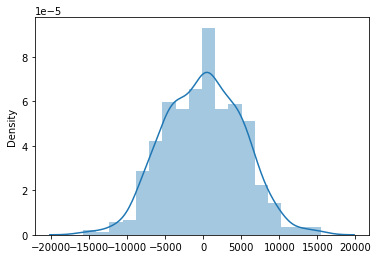

In [23]:
#Histograma dos resíduos
sns.distplot(linreg.resid)

In [24]:
#Teste da normalidade dos resíduos
shapiro(linreg.resid)

ShapiroResult(statistic=0.9973931312561035, pvalue=0.5946245193481445)

C:\Users\felbu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

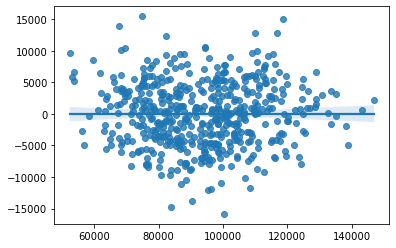

In [25]:
#Diagrama de dispersão dos resíduos
sns.regplot(linreg.fittedvalues, linreg.resid)

In [26]:
#Outliers e observações influentes
#dfbetas, distância de cook, resíduos padronizados e studentizados, alavancagem e dffit 
linreg.get_influence().summary_frame().head()

,dfb_const,dfb_Área,dfb_Quartos,dfb_Idade,dfb_Mês_Abril,dfb_Mês_Junho,dfb_Mês_Maio,dfb_Localização_Dallas,dfb_Localização_Fort Worth,dfb_Corretora_Easton,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.045203,0.052295,-0.031712,-0.001635,0.069411,0.071148,0.067029,-0.034842,0.005162,0.002813,0.001583,-1.203561,0.010810,-0.125818,-1.204094,-0.125874
1,-0.007487,0.010531,-0.000473,-0.003011,-0.006348,-0.005586,-0.006057,0.004769,0.001451,-0.000801,0.000030,0.113377,0.022789,0.017314,0.113267,0.017297
2,-0.010205,0.029697,-0.019785,0.007125,-0.018373,-0.016344,-0.017531,0.011056,0.001278,-0.001161,0.000189,0.324164,0.017701,0.043516,0.323878,0.043477
3,-0.005530,0.000110,0.005964,0.004536,-0.007011,-0.006495,-0.006679,0.004711,0.000405,-0.000552,0.000022,0.118516,0.015127,0.014688,0.118401,0.014674
4,0.017750,-0.027520,0.016194,0.011613,-0.029813,-0.030425,-0.028730,0.014738,-0.003072,-0.000911,0.000324,0.509579,0.012327,0.056930,0.509208,0.056888


In [27]:
linreg.get_prediction(X).summary_frame().head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,98638.642227,533.188254,97591.116715,99686.167739,88509.253197,108768.031256
1,143225.242227,774.156818,141704.299087,144746.185367,133036.008671,153414.475782
2,128852.405220,682.286102,127511.955400,130192.855039,118688.546792,139016.263647
3,122496.843111,630.731692,121257.679394,123736.006829,112345.846159,132647.840064
4,96202.935195,569.373521,95084.318486,97321.551904,86065.947686,106339.922704


# Regressão Logística

In [28]:
X = df[['Área', 'Quartos', 'Idade', 'Localização_Dallas', 'Localização_Fort Worth']]
y = df['Corretora_Easton']

In [29]:
X = sm.add_constant(X)
X.head()

,const,Área,Quartos,Idade,Localização_Dallas,Localização_Fort Worth
0,1.0,1605,3,6,1,0
1,1.0,2741,4,5,1,0
2,1.0,2393,3,7,1,0
3,1.0,2209,4,8,1,0
4,1.0,1544,3,7,1,0


In [30]:
logreg = sm.Logit(y,X).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287061
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       Corretora_Easton   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.08299
Time:                        01:04:13   Log-Likelihood:                -148.70
converged:                       True   LL-Null:                       -162.16
Covariance Type:            nonrobust   LLR p-value:                 5.925e-05
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.3486      1.072     -2.191      0.028      -4.449      

# Modelos Lineares Generalizados (GLM)

## Brevíssima revisão 

Regressão tradicional (notação simplificada):

$$
y = \beta_0 + \beta_1X_1 + ...
$$

O que acontece se...

* $y \in \{0,1\}$? (sim/não)
* $y \in \{0,1,2,3,...\}$? (contagem)
* $y \in (0; 1)$?  (porcentagem)
* $y \in \{Classe 1, Classe 2, Classe 3 ,...\}$ (classificação)
* $y \in \{Nível 1, Nível 2, Nível 3 ,...\}$ (classificação ordinal)

> Uma regressão linear simples exige que y possa (em teoria, pelo menos) ser qualquer número real!

Solução:

Usar uma função $g(\cdot)$ que transforme os valores de $y$ em números reais: 

$$
g: (\text{valores possíveis para y}) \rightarrow \mathbb{R}
$$

Assim, poderemos fazer (notação simplificada):

$$
g(y) = \beta_0 + \beta_1X_1 + ...
$$

Esta é a expressão geral do __modelo de regressão linear generalizados__.

Dependendo da escolha de $g$ teremos modelos diferentes, com aplicações distintas:

* Regressão Logit / Probit
* Regressão ordinal
* Regressão de Poisson / Binomial Negativa
* Regressão Beta
* Regressão Tweedie
* Regressões com inflação (ZIP e BZOI)
* etc.


## Regressão Logística (de novo)

In [31]:
#Logit de novo, mas chamando como um caso particular de GLM...
logit_2 = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(logit_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Corretora_Easton   No. Observations:                  518
Model:                            GLM   Df Residuals:                      512
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -148.70
Date:                Tue, 26 Jul 2022   Deviance:                       297.40
Time:                        01:04:13   Pearson chi2:                     520.
No. Iterations:                     6   Pseudo R-squ. (CS):            0.05063
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

## Regressão de Poisson

In [32]:
y = df['Quartos']
X = df[['Idade','Localização_Dallas','Localização_Fort Worth']]

poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Quartos   No. Observations:                  518
Model:                            GLM   Df Residuals:                      515
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -879.40
Date:                Tue, 26 Jul 2022   Deviance:                       205.24
Time:                        01:04:13   Pearson chi2:                     237.
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.3033
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Idade                      0

# Séries temporais

## Brevíssima revisão

### Estacionariedade

* Forte
* Fraca
    * $E(y_t)$ é o mesmo, independentemente do valor de $t$
    * $V(y_t)$ é o mesmo, independentemente do valor de $t$
    * $Cov(y_{t1}, y_{t2})$ não depende nem de $t_1$ nem de $t_2$ mas apenas de quanto tempo se passou entre $t_1$ e $t_2$

### AR(1)

$$
y_t = \rho y_{t-1} + \epsilon_t  
$$

$$
\epsilon \sim N(0,\sigma^2)
$$

Supondo estacionariedade da série...

* Como você espera que seja a correlação de $y_t$ com ...
    * $y_{t-1}$? 
    * $y_{t-2}$? 
    * $y_{t-3}$? 
    * $y_{t-200}$?
* Como você espera que seja a variância desta série com...
    * $\rho = 0$?
    * $\rho = 1000$? (é razoável?)
    * $\rho = 0.5$? 
    * $\rho = -0.5$?


$$
E(y_t) = E(y_{t-1}) \implies E(y_t) = \rho E(y_t) = 0
$$

(e se houver tendência?)

$$
V(y_t) = V(y_{t-1}) \implies V(y_t) = \rho^2 V(y_t) + \sigma^2 \implies V(y_t) = \frac{\sigma^2}{1-\rho^2}
$$

Ou seja, devemos ter $ |\rho| < 1$ para série estacionária.

$$
\begin{align}
\gamma(h) \equiv &Cov(y_t; y_{t-h}) = \\
&Cov(\rho y_{t-1} + \epsilon_{t}; y_{t-h})= \\
&\rho Cov(y_{t-1};y_{t-h}) + Cov(\epsilon_{t}; y_{t-h}) =\\
&\rho \gamma(h-1)
\end{align}
$$

como $\gamma(0) = V(y_t)$, resulta que $\gamma(0), \gamma(1), \gamma(2), ...$ formam uma P.G. com razão $\rho$ e primeiro termo $V(y_t) = \frac{\sigma^2}{1-\rho^2}$. Como $|\rho| < 1$, essa P.G. se parece com um decaimento exponencial.

### MA(1)

$$
y_t = \rho \epsilon_{t-1} + \epsilon_t  
$$

$$
\epsilon \sim N(0,\sigma^2)
$$

Supondo estacionariedade da série...

* Como você espera que seja a correlação de $y_t$ com ...
    * $y_{t-1}$? 
    * $y_{t-2}$? 
    * $y_{t-3}$? 
    * $y_{t-200}$?
* Como você espera que seja a variância desta série com...
    * $\rho = 0$?
    * $\rho = 1000$? (é razoável?)
    * $\rho = 0.5$? 
    * $\rho = -0.5$?

### ARMA(1,1)

ARMA = AR + MA

$$
y_t = AR(1) + MA(1) = \rho y_{t-1} + \phi \epsilon_{t-1} + \epsilon_t
$$

### Determinação das ordens dos modelos usando ACF e PACF

![image.png](attachment:529799d2-705e-4b0e-ba94-7458fc094367.png)

### ARIMA(1,1,1)

* Diferenciação como forma de eliminação de tendência
* Ordem de integração de uma série temporal
* ARIMA = AR + I de "integração" + MA
* Prós e contras da diferenciação como forma de eliminação da tendência
  
Exemplo para um Ruído Branco:
$$
V(\epsilon_t - \epsilon_{t-1}) = V(\epsilon_t) + V(\epsilon_{t-1}) = 2\sigma^2 > \sigma^2
$$

### A questão da Raiz Unitária

$$
y_t = y_{t-1} + \epsilon_{t}
$$

* Consequências da raiz unitária
* Teste de Dickey-Fuller Aumentado

## Python!

O módulo `tsa` permite desenvolver modelos em séries temporais

In [33]:
#!pip install investpy

In [34]:
from investpy import get_stock_recent_data, get_stock_historical_data
from datetime import date, timedelta

In [35]:
data_inicio = format(date.today() - timedelta(365), "%d/%m/%Y")
data_fim = format(date.today() - timedelta(1), "%d/%m/%Y")
data_inicio, data_fim

('26/07/2021', '25/07/2022')

In [36]:
petr4 = get_stock_historical_data('petr4', 'brazil', data_inicio, data_fim )['Close']
petr4.head()

Date
2021-07-26    27.47
2021-07-27    27.15
2021-07-28    27.71
2021-07-29    27.81
2021-07-30    26.91
Name: Close, dtype: float64

In [37]:
petr4.tail()

Date
2022-07-19    29.18
2022-07-20    29.17
2022-07-21    29.02
2022-07-22    29.33
2022-07-25    30.70
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

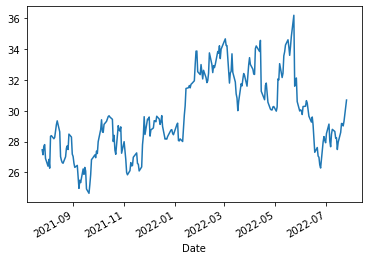

In [38]:
petr4.plot()

## Autoccorelação e autocorrelação parcial (ACF e PACF)

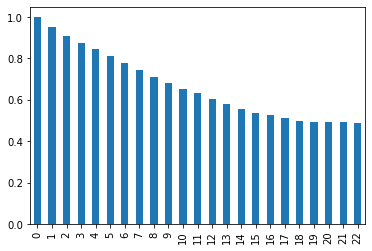

In [39]:
pd.Series(sm.tsa.acf(petr4, nlags=22)).plot(kind='bar');

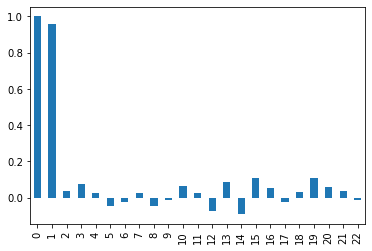

In [40]:
pd.Series(sm.tsa.pacf(petr4, nlags=22)).plot(kind='bar');

## Teste de Raiz Unitária

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
_, p, _, _, _, _ = adfuller(petr4)
p

0.12266074206069988

In [43]:
y = petr4.reset_index()['Close']
y

0      27.47
1      27.15
2      27.71
3      27.81
4      26.91
       ...  
245    29.18
246    29.17
247    29.02
248    29.33
249    30.70
Name: Close, Length: 250, dtype: float64

In [44]:
adfuller(petr4)

(-2.4711177960286648,
 0.12266074206069988,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 531.3055160716613)

## AR, MA, ARMA e ARIMA

In [45]:
arima = sm.tsa.arima.ARIMA(y, order=(1, 0, 0), trend=[0, 1,1]).fit()
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -312.396
Date:                Tue, 26 Jul 2022   AIC                            632.793
Time:                        01:04:16   BIC                            646.879
Sample:                             0   HQIC                           638.462
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4080      0.063      6.448      0.000       0.284       0.532
x2            -0.0012      0.000     -4.303      0.000      -0.002      -0.001
ar.L1          0.9776      0.002    539.304      0.0

Análise dos resultados:
* Independência serial dos resíduos
* Heteroscedasticidade
* Normalidade dos resíduos
* Assimetria
* Curtose
* Premissas do modelos satisfeitas?
(supondo que sim, apenas para fins didáticos, continuamos a análise:)
* quais coeficientes são significantes?
* analise dos coeficientes significantes

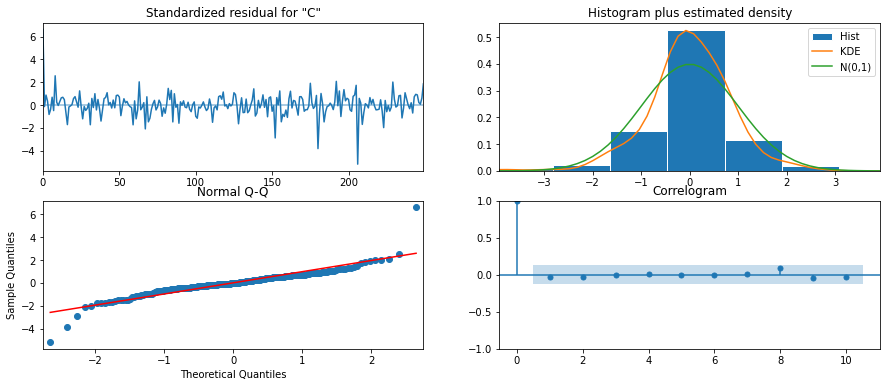

In [46]:
arima.plot_diagnostics(figsize=(15,6),lags=10);

In [47]:
arima.resid

0      27.063175
1      -0.119167
2       0.747016
3       0.292933
4      -0.711384
         ...    
245     0.762328
246     0.191655
247     0.057839
248     0.520946
249     1.594394
Length: 250, dtype: float64

In [48]:
arima.forecast(steps=10)

250    30.438397
251    30.176024
252    29.912843
253    29.648820
254    29.383921
255    29.118111
256    28.851358
257    28.583629
258    28.314893
259    28.045119
Name: predicted_mean, dtype: float64

## Auto ARMA
(só funciona para séries estacionárias - não é o nosso caso)

In [77]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [88]:
auto_arma = arma_order_select_ic(y, max_ar=4, max_ma=2, ic=['aic','bic'])
#Note que a otimização de MV não convergiu, como esperado.
#Não deveríamos rodar essa função nesse caso. Fazemos apenas para apresentar a função.

C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [89]:
auto_arma.aic

,0,1,2
0,14342.140913,11571.804795,11541.553272
1,11540.085210,11430.507942,11430.799700
2,11494.634765,11431.468072,11433.547565
3,11474.818690,11430.342077,11433.550905
4,11463.644561,11430.173811,11433.240892


In [90]:
auto_arma.bic

,0,1,2
0,14350.640864,11584.554720,11558.553173
1,11552.835136,11447.507843,11452.049576
2,11511.634666,11452.717948,11459.047416
3,11496.068566,11455.841928,11463.300732
4,11489.144412,11459.923638,11467.240694


In [91]:
#Melhor modelo segundo o AIC
auto_arma.aic_min_order

(4, 1)

In [92]:
#Melhor modelo segundo o BIC
auto_arma.bic_min_order

(1, 1)

# Bootstraping

Fornece intervalos de confiança e erros-padrão para parâmetros cujas distribuições amostrais não são conhecidas (ex.: distância interquartílica)

In [93]:
from scipy.stats import bootstrap

In [94]:
import numpy as np
x = np.random.gamma(shape=3, scale=.1, size=10000)

C:\Users\felbu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


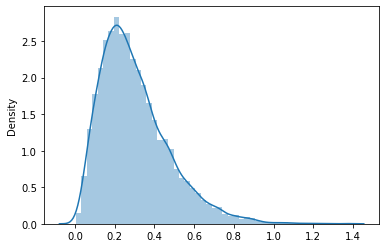

In [95]:
sns.distplot(x);

In [96]:
def IQR(x, **kwargs):
    Q3 = np.quantile(x, q=.75,**kwargs)
    Q1 = np.quantile(x, q=.25, **kwargs)
    return(Q3-Q1)

In [97]:
IQR(x)

0.21715746327292293

In [98]:
x = (x,)  # amostras devem estar em uma sequência
x

(array([0.09389724, 0.14676921, 0.12146002, ..., 0.19327169, 0.31650641,
        0.18366137]),)

In [99]:
boot = bootstrap(x, IQR, confidence_level=0.95, n_resamples=1000)
print(boot)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.21156517496343205, high=0.22323142335874463), standard_error=0.0029396572968083197)


In [100]:
#Intervalo de confiança estimado contém valor verdadeiro?
a, b = boot.confidence_interval
print((IQR(x) > a) and (IQR(x) < b))

True


## Value at Risk (VAR) empírico

C:\Users\felbu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

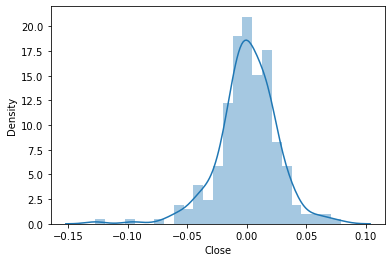

In [101]:
x = petr4.pct_change().dropna()
sns.distplot(x)

In [102]:
def var5(x, **kwargs):
    return(np.quantile(x,q=0.05,**kwargs))

In [103]:
var5(x)

-0.03941986057630131

In [104]:
x = (x,)
boot = bootstrap(x, var5, confidence_level=0.95, n_resamples=1000)
print(boot.confidence_interval)

ConfidenceInterval(low=-0.056215083798882626, high=-0.03505939418247223)


C:\Users\felbu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


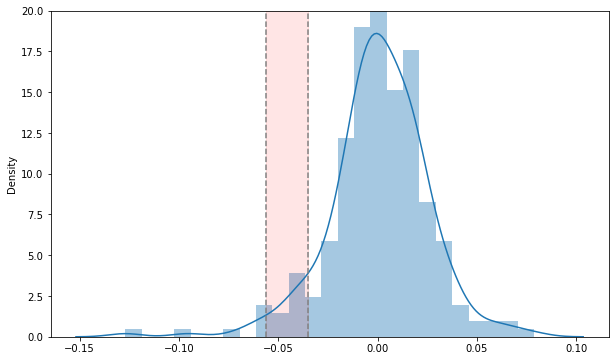

In [105]:
plt.figure(figsize=(10,6))
sns.distplot(x)
a, b = boot.confidence_interval
plt.axvline(x=a, c='gray', ls='dashed')
plt.axvline(x=b, c='gray', ls='dashed')
plt.fill_betweenx((0,100),a,b, color='red', alpha=0.1)
plt.ylim(0,20)
plt.show()

# Ajuste de uma curva genérica a um conjunto de pontos

In [198]:
#PIB da China de 1960 a 2014
china = pd.read_csv('https://raw.githubusercontent.com/sudhanshu456/Machine-Learning-with-Python-IBM/master/Week%202/Data_set/china_gdp.csv', 
                    index_col='Year', sep=',', decimal='.')

china['Value'] = china['Value'] / 1e12 #coloca os valores em trilhões 

china.head()

,Value
Year,
1960,0.059184
1961,0.049557
1962,0.046685
1963,0.050097
1964,0.059062


<AxesSubplot:xlabel='Year'>

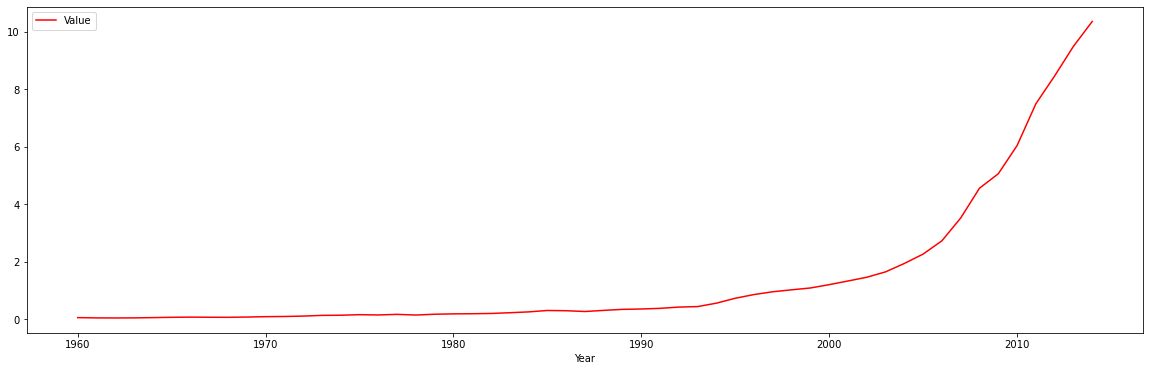

In [199]:
china.plot(figsize=(20,6), c='red')

In [200]:
def f(x,a,b):
    return(a * np.exp(b*(x-1960)))

In [201]:
from scipy.optimize import curve_fit

In [202]:
X = china.index.to_numpy()
y = china.Value.to_numpy()

In [203]:
popt, pcov = curve_fit(f, X, y, p0=(0,1))

In [204]:
a, b = popt
a, b

(0.0024698043889228452, 0.15550483241633525)

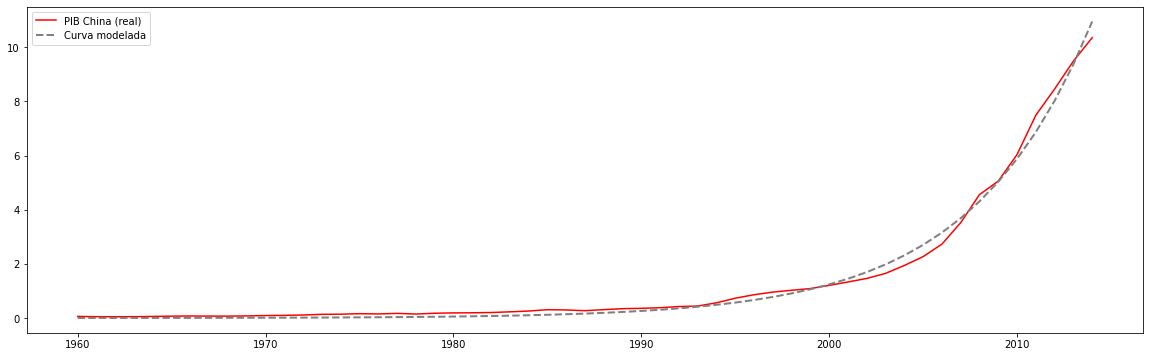

In [205]:

plt.figure(figsize=(20,6))
plt.plot(china.index, china.Value, label='PIB China (real)', c='red')
plt.plot(china.index, f(china.index, *popt), label='Curva modelada', c='gray', linewidth=2, linestyle='dashed')
plt.legend()
plt.show()

In [206]:
pcov

array([[ 1.48290400e-07, -1.16678097e-06],
       [-1.16678097e-06,  9.21631794e-06]])

In [207]:
#Erros-padrão dos coeficientes estimados
sigma_a, sigma_b = np.sqrt(np.diag(pcov))
sigma_a, sigma_b

(0.00038508492616158325, 0.0030358389183137327)

# Simulações de Monte Carlo

$$
y = a \cdot e^{b\cdot x} \implies T_{duplic} = \frac{\ln(2)}{b}
$$

In [235]:
def tempo_duplic(b):
    return(np.log(2)/b)

In [247]:
#Usando a estimativa pontual de b...
tempo_duplic(b)

4.457399617679871

O valor de $b$ é conhecido com incerteza.  
Sabemos sua média e desvio-padrão. 
Vamos simular 1 milhão de valores para b e construir uma distribuição de probabilidades para o tempo de duplicação:

In [248]:
N = 10000000
valores_simulados = np.random.normal(loc = popt[1], scale = sigma_b, size=N)
valores_simulados[:10]

array([0.15475778, 0.15809944, 0.15537473, 0.15514972, 0.15859436,
       0.15855008, 0.15220307, 0.15515923, 0.15549623, 0.15354528])

In [249]:
tempos_duplic_simulados = np.apply_along_axis(tempo_duplic,0, valores_simulados)
tempos_duplic_simulados[:10]

array([4.47891663, 4.38424808, 4.46113213, 4.46760185, 4.37056628,
       4.37178712, 4.55409457, 4.46732807, 4.45764608, 4.51428507])

In [255]:
pd.Series(tempos_duplic_simulados).describe().round(2)

count    10000000.00
mean            4.46
std             0.09
min             4.04
25%             4.40
50%             4.46
75%             4.52
max             4.94
dtype: float64

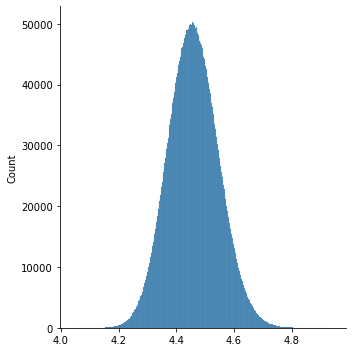

In [251]:
sns.displot(tempos_duplic_simulados);

In [258]:
china.tail(12)

,Value
Year,
2003,1.649929
2004,1.941746
2005,2.268599
2006,2.729784
2007,3.523094
2008,4.558431
2009,5.059420
2010,6.039659
2011,7.492432
